### Stock Price Prediction using ARIMA and LSTM - (Time Series Analysis)

Goal: Predict future stock prices based on historical data using two approaches—ARIMA (AutoRegressive Integrated Moving Average)
and LSTM (Long Short-Term Memory, a type of neural network).

In [1]:
## Let us import the necessary libraries and fetch Apple stock prices using the yfnance library

In [3]:
#Calling the YFINANCE API and installing it on our computer
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dt = yf.download("AAPL", start="2020-01-01", end="2024-10-31")

[*********************100%***********************]  1 of 1 completed


## Data Exploration and Preprocessing

In [11]:
# Let's study the data and clean it

In [9]:
dt.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.876091,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.167618,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.742653,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.400536,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.565193,75.797501,76.110001,74.290001,74.290001,132079200


In [10]:
dt.tail(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-10-24 00:00:00+00:00,230.570007,230.570007,230.820007,228.410004,229.979996,31109500
2024-10-25 00:00:00+00:00,231.410004,231.410004,233.220001,229.570007,229.740005,38802300
2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100
2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900


In [15]:
dt.shape

(1216, 6)

In [12]:
dt.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1.216000e+03
mean,149.534009,151.193232,152.748674,149.482481,151.063158,9.211181e+07
std,39.605438,39.037589,39.193160,38.845441,39.037865,5.338318e+07
min,54.569733,56.092499,57.125000,53.152500,57.020000,2.404830e+07
25%,125.380098,127.895000,129.899998,126.664997,128.397503,5.685540e+07
50%,149.337479,151.019997,152.900002,149.349998,150.820000,7.738550e+07
75%,174.911488,176.080002,177.877499,174.490002,176.127495,1.089580e+08
max,236.479996,236.479996,237.490005,234.449997,236.479996,4.265100e+08


In [13]:
dt.info

<bound method DataFrame.info of Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2020-01-02 00:00:00+00:00   72.876091   75.087502   75.150002   73.797501   
2020-01-03 00:00:00+00:00   72.167618   74.357498   75.144997   74.125000   
2020-01-06 00:00:00+00:00   72.742653   74.949997   74.989998   73.187500   
2020-01-07 00:00:00+00:00   72.400536   74.597504   75.224998   74.370003   
2020-01-08 00:00:00+00:00   73.565193   75.797501   76.110001   74.290001   
...                               ...         ...         ...         ...   
2024-10-24 00:00:00+00:00  230.570007  230.570007  230.820007  228.410004   
2024-10-25 00:00:00+00:00  231.410004  231.410004  233.220001  229.570007   
2024-10-28 00:00:00+00:00  233.399994  233.399994  234.729996  232.550003   
2024-10-29 00:00:00+00:00  233.669998  233.6

In [16]:
# Check for missing values

In [18]:
dt.isnull()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,False,False,False,False,False,False
2020-01-03 00:00:00+00:00,False,False,False,False,False,False
2020-01-06 00:00:00+00:00,False,False,False,False,False,False
2020-01-07 00:00:00+00:00,False,False,False,False,False,False
2020-01-08 00:00:00+00:00,False,False,False,False,False,False
...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,False,False,False,False,False,False
2024-10-25 00:00:00+00:00,False,False,False,False,False,False


In [19]:
dt.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [20]:
# Method to check for duplicattes and check if any exists

In [29]:
dt = pd.DataFrame(dt)

# Function to find duplicate columns
def find_duplicate_columns(dt):
    duplicate_columns = []
    columns = dt.columns
    
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            if dt[columns[i]].equals(dt[columns[j]]):
                duplicate_columns.append((columns[i], columns[j]))
    
    return duplicate_columns

In [30]:
duplicates = find_duplicate_columns(dt)
print("Duplicate columns:", duplicates)

Duplicate columns: []


In [32]:
# Visualize the data

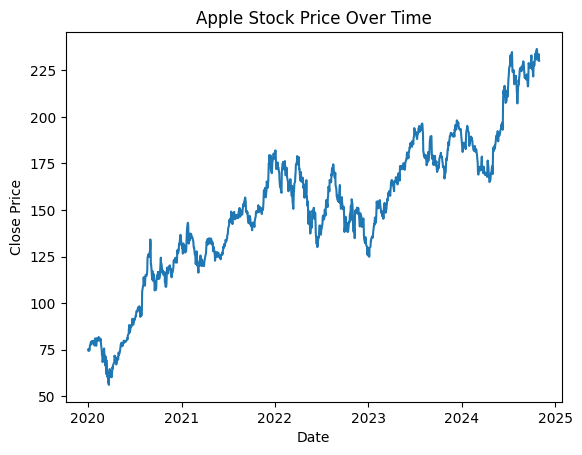

In [33]:
plt.plot(dt['Close'])
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()